# A3: From motions to actions

In [1]:
import numpy as np;
import scipy as sp;
from sklearn import tree;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import cross_val_score;
from sklearn import svm;
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# Load data
walk_location = r'walking.csv'
walk_raw = pd.read_csv(walk_location)
run_location = r'running.csv'
run_raw = pd.read_csv(run_location)
upstairs_location = r'upstair.csv'
upstairs_raw = pd.read_csv(upstairs_location)
sitting_location = r'sitting.csv'
sitting_raw = pd.read_csv(sitting_location)
drive_location = r'driving.csv'
drive_raw = pd.read_csv(drive_location)

# Make Features
## To select proper features, I plot 20 seconds of data for each type of data (walk, run, upstairs, sitting, and drive):

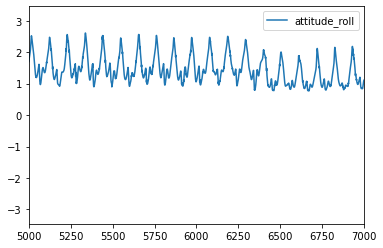

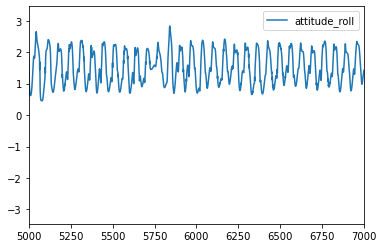

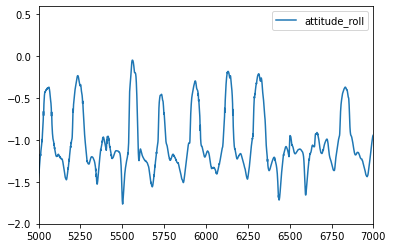

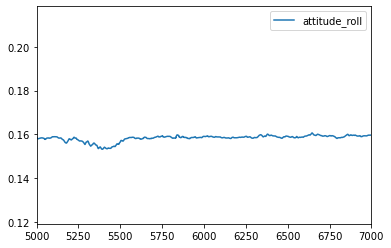

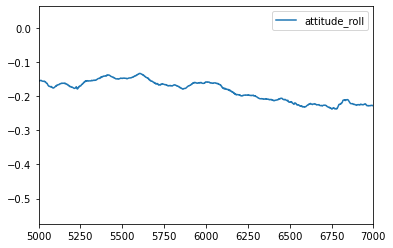

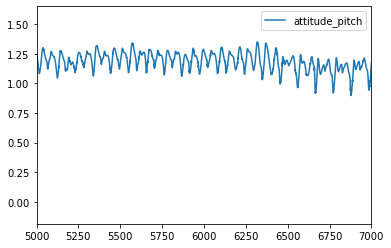

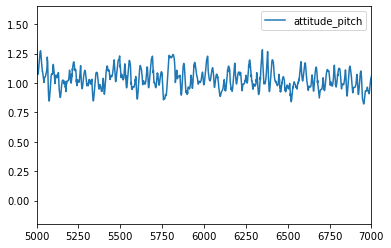

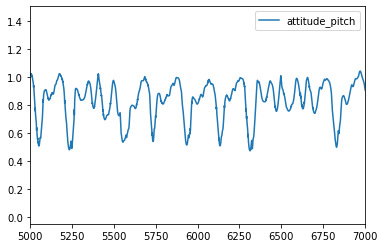

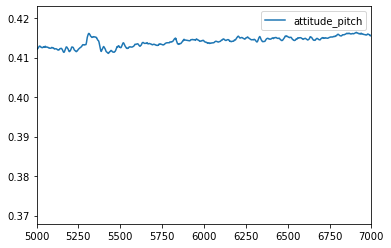

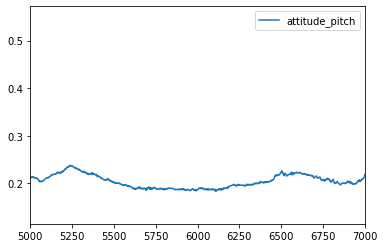

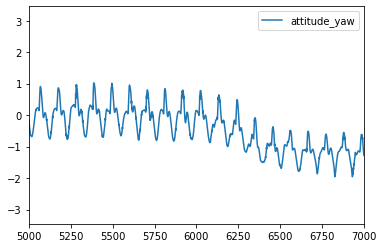

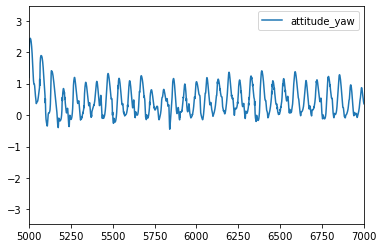

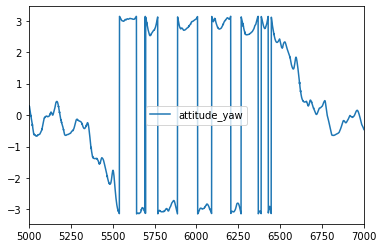

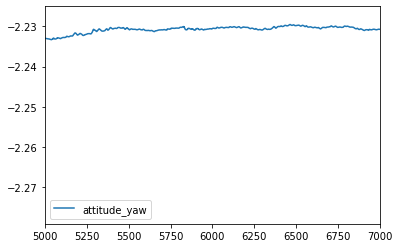

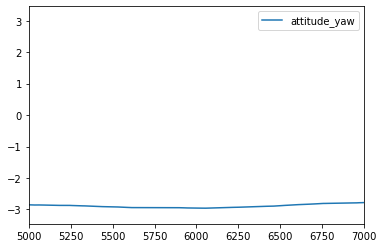

In [3]:
walk_raw[['attitude_roll']].plot(xlim = (5000, 7000))
run_raw[['attitude_roll']].plot(xlim = (5000, 7000))
upstairs_raw[['attitude_roll']].plot(xlim = (5000, 7000))
sitting_raw[['attitude_roll']].plot(xlim = (5000, 7000))
drive_raw[['attitude_roll']].plot(xlim = (5000, 7000))

walk_raw[['attitude_pitch']].plot(xlim = (5000, 7000))
run_raw[['attitude_pitch']].plot(xlim = (5000, 7000))
upstairs_raw[['attitude_pitch']].plot(xlim = (5000, 7000))
sitting_raw[['attitude_pitch']].plot(xlim = (5000, 7000))
drive_raw[['attitude_pitch']].plot(xlim = (5000, 7000))

walk_raw[['attitude_yaw']].plot(xlim = (5000, 7000))
run_raw[['attitude_yaw']].plot(xlim = (5000, 7000))
upstairs_raw[['attitude_yaw']].plot(xlim = (5000, 7000))
sitting_raw[['attitude_yaw']].plot(xlim = (5000, 7000))
drive_raw[['attitude_yaw']].plot(xlim = (5000, 7000))


## Stage conclusion：All the above columns look good enough for training and testing.


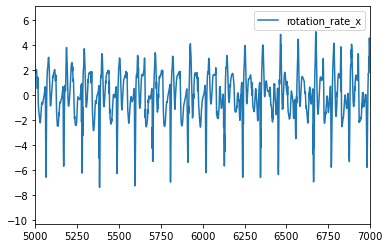

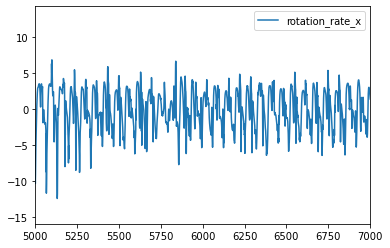

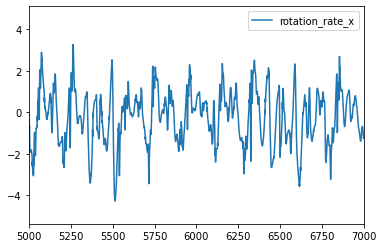

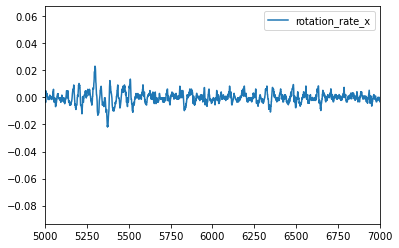

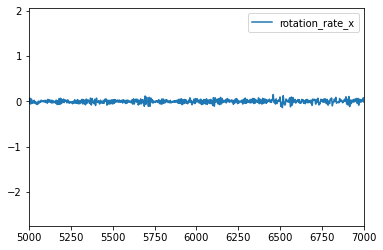

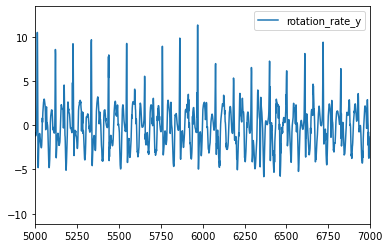

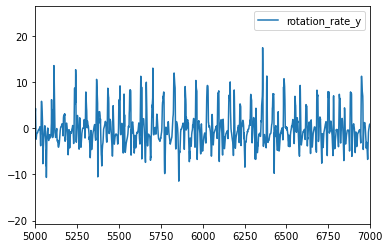

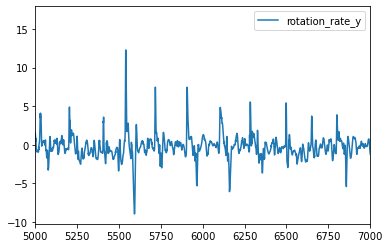

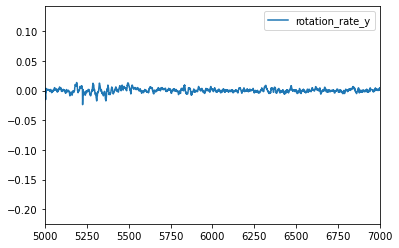

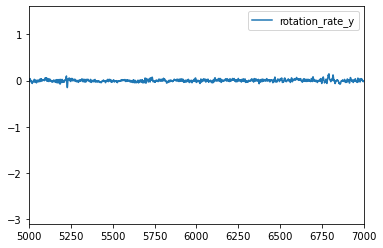

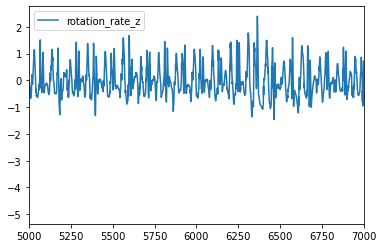

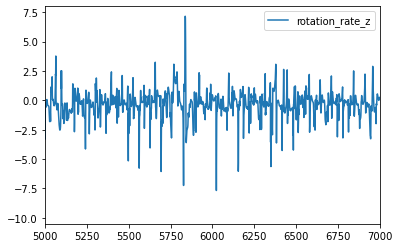

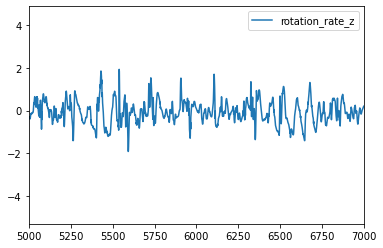

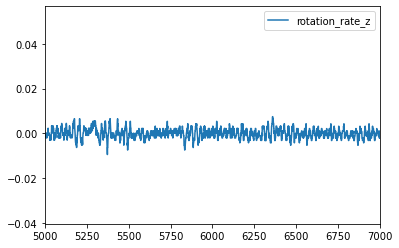

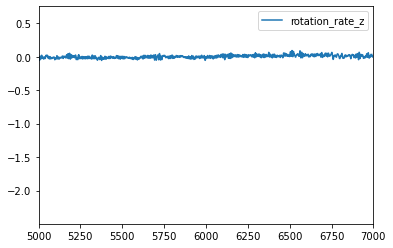

In [5]:
walk_raw[['rotation_rate_x']].plot(xlim = (5000, 7000))
run_raw[['rotation_rate_x']].plot(xlim = (5000, 7000))
upstairs_raw[['rotation_rate_x']].plot(xlim = (5000, 7000))
sitting_raw[['rotation_rate_x']].plot(xlim = (5000, 7000))
drive_raw[['rotation_rate_x']].plot(xlim = (5000, 7000))

walk_raw[['rotation_rate_y']].plot(xlim = (5000, 7000))
run_raw[['rotation_rate_y']].plot(xlim = (5000, 7000))
upstairs_raw[['rotation_rate_y']].plot(xlim = (5000, 7000))
sitting_raw[['rotation_rate_y']].plot(xlim = (5000, 7000))
drive_raw[['rotation_rate_y']].plot(xlim = (5000, 7000))

walk_raw[['rotation_rate_z']].plot(xlim = (5000, 7000))
run_raw[['rotation_rate_z']].plot(xlim = (5000, 7000))
upstairs_raw[['rotation_rate_z']].plot(xlim = (5000, 7000))
sitting_raw[['rotation_rate_z']].plot(xlim = (5000, 7000))
drive_raw[['rotation_rate_z']].plot(xlim = (5000, 7000))


## Stage conclusion：The column "rotation_rate_z" in csv files doesn't look good enough for training and testing.

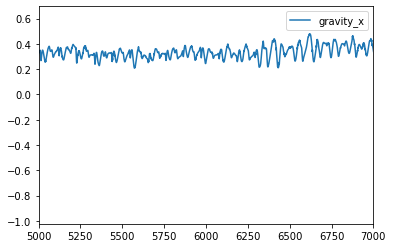

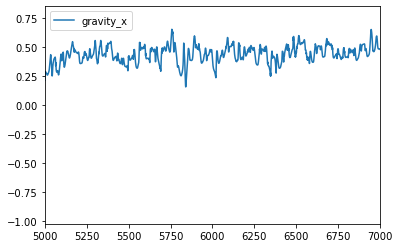

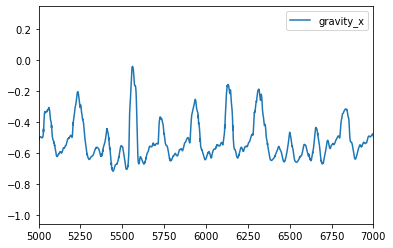

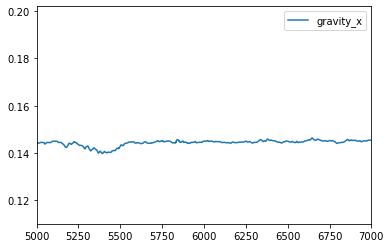

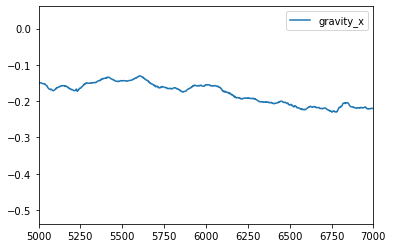

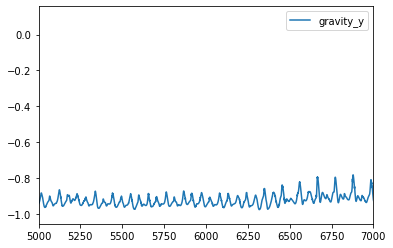

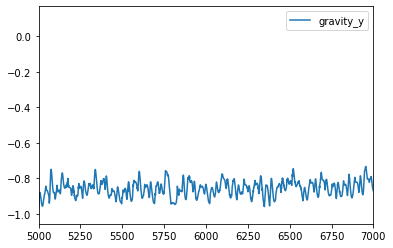

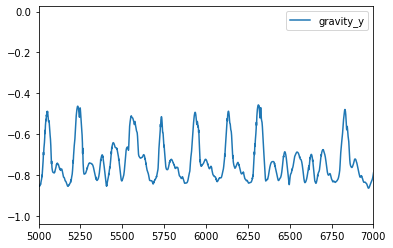

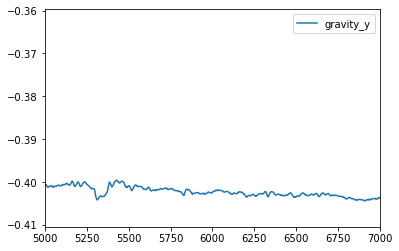

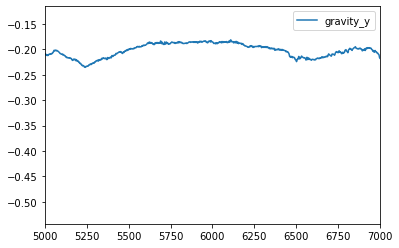

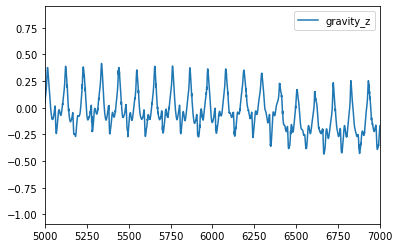

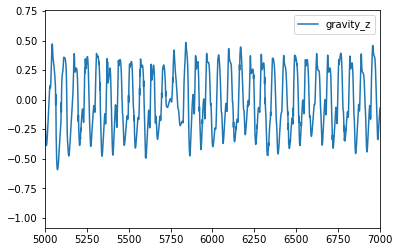

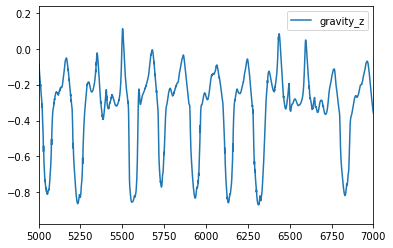

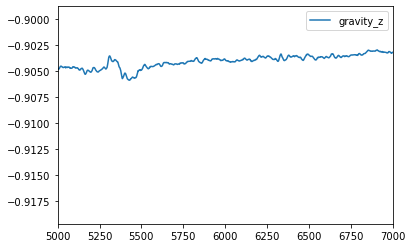

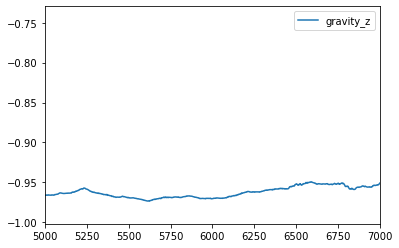

In [6]:
walk_raw[['gravity_x']].plot(xlim = (5000, 7000))
run_raw[['gravity_x']].plot(xlim = (5000, 7000))
upstairs_raw[['gravity_x']].plot(xlim = (5000, 7000))
sitting_raw[['gravity_x']].plot(xlim = (5000, 7000))
drive_raw[['gravity_x']].plot(xlim = (5000, 7000))

walk_raw[['gravity_y']].plot(xlim = (5000, 7000))
run_raw[['gravity_y']].plot(xlim = (5000, 7000))
upstairs_raw[['gravity_y']].plot(xlim = (5000, 7000))
sitting_raw[['gravity_y']].plot(xlim = (5000, 7000))
drive_raw[['gravity_y']].plot(xlim = (5000, 7000))

walk_raw[['gravity_z']].plot(xlim = (5000, 7000))
run_raw[['gravity_z']].plot(xlim = (5000, 7000))
upstairs_raw[['gravity_z']].plot(xlim = (5000, 7000))
sitting_raw[['gravity_z']].plot(xlim = (5000, 7000))
drive_raw[['gravity_z']].plot(xlim = (5000, 7000))


## Stage conclusion：The column "gravity_y" and "gravity_z" in csv files doesn't look good enough for training and testing.

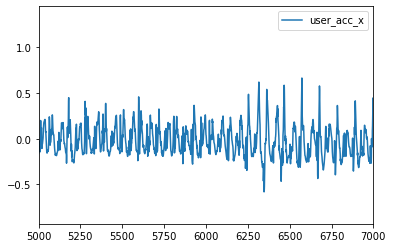

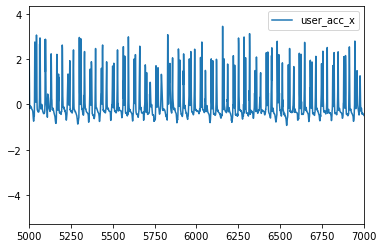

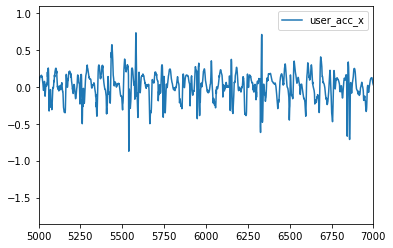

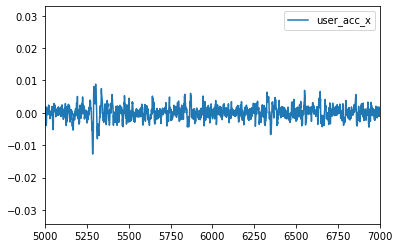

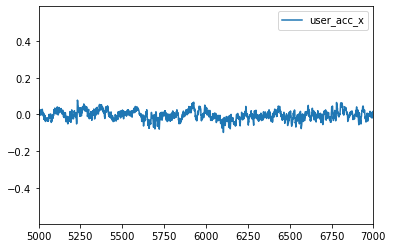

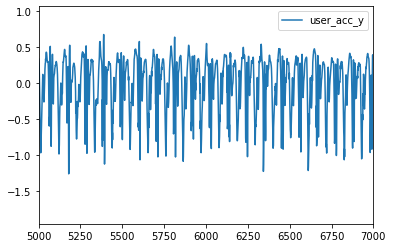

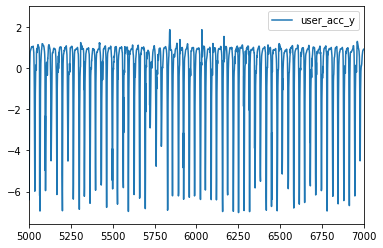

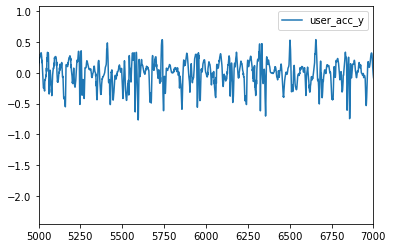

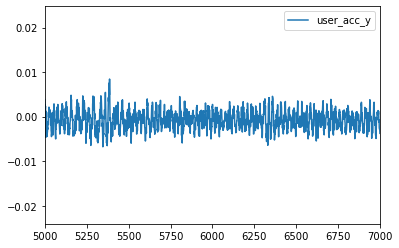

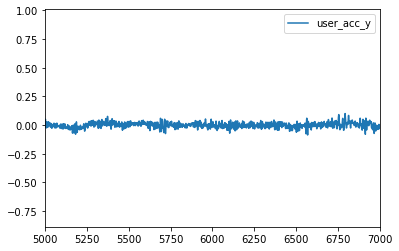

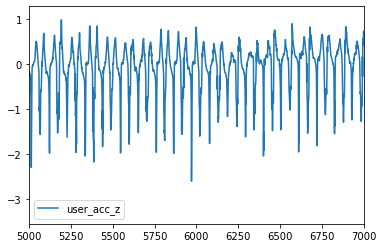

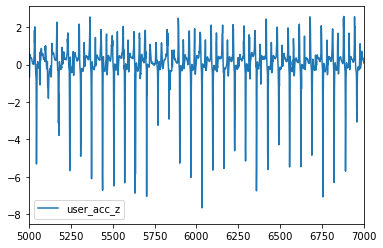

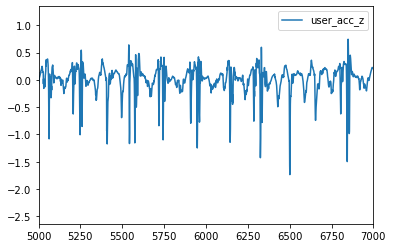

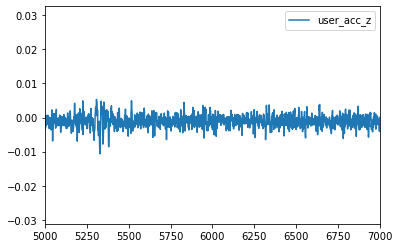

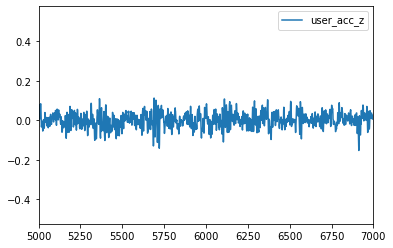

In [7]:
walk_raw[['user_acc_x']].plot(xlim = (5000, 7000))
run_raw[['user_acc_x']].plot(xlim = (5000, 7000))
upstairs_raw[['user_acc_x']].plot(xlim = (5000, 7000))
sitting_raw[['user_acc_x']].plot(xlim = (5000, 7000))
drive_raw[['user_acc_x']].plot(xlim = (5000, 7000))

walk_raw[['user_acc_y']].plot(xlim = (5000, 7000))
run_raw[['user_acc_y']].plot(xlim = (5000, 7000))
upstairs_raw[['user_acc_y']].plot(xlim = (5000, 7000))
sitting_raw[['user_acc_y']].plot(xlim = (5000, 7000))
drive_raw[['user_acc_y']].plot(xlim = (5000, 7000))

walk_raw[['user_acc_z']].plot(xlim = (5000, 7000))
run_raw[['user_acc_z']].plot(xlim = (5000, 7000))
upstairs_raw[['user_acc_z']].plot(xlim = (5000, 7000))
sitting_raw[['user_acc_z']].plot(xlim = (5000, 7000))
drive_raw[['user_acc_z']].plot(xlim = (5000, 7000))


## Stage conclusion：All the column "user_acc_x", "user_acc_y", and "user_acc_z" in csv files looks really noise, which may not good to use for training and testing.

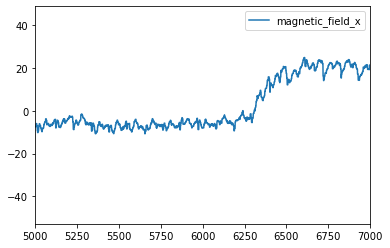

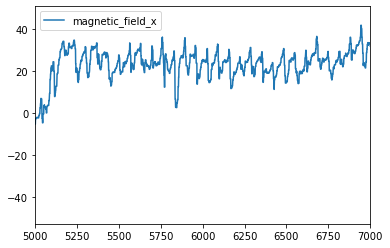

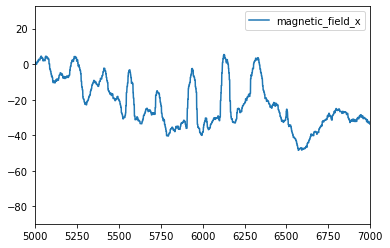

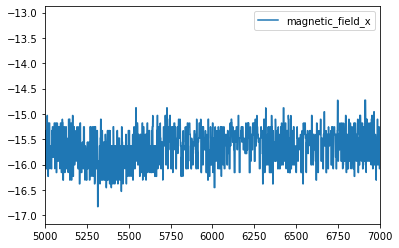

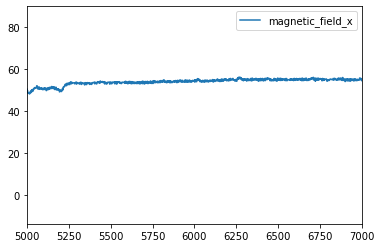

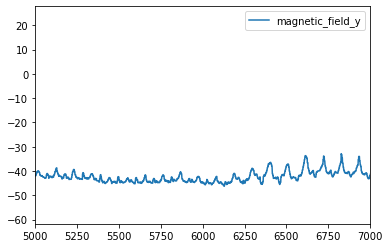

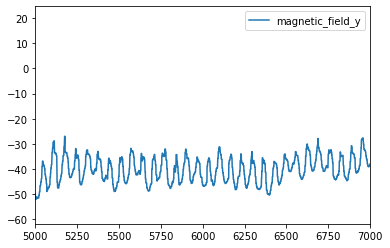

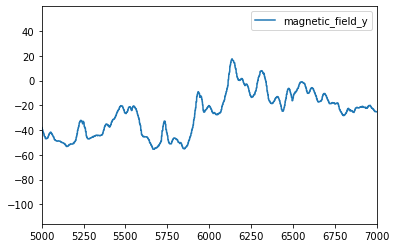

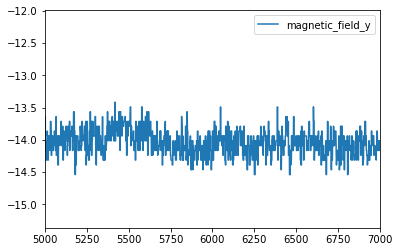

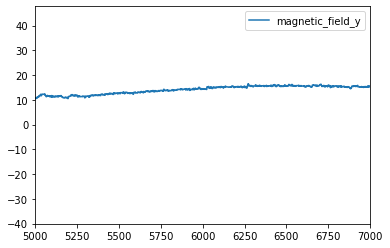

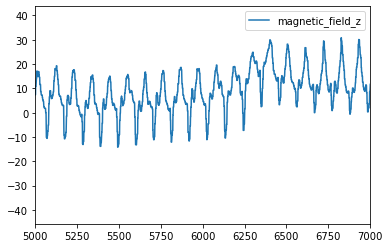

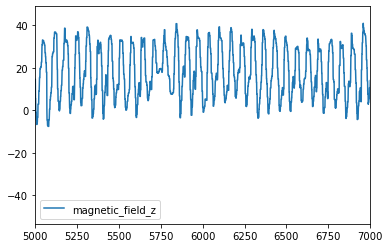

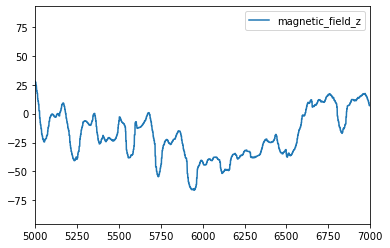

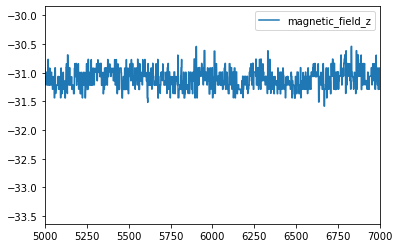

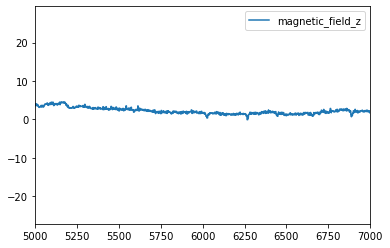

In [8]:
walk_raw[['magnetic_field_x']].plot(xlim = (5000, 7000))
run_raw[['magnetic_field_x']].plot(xlim = (5000, 7000))
upstairs_raw[['magnetic_field_x']].plot(xlim = (5000, 7000))
sitting_raw[['magnetic_field_x']].plot(xlim = (5000, 7000))
drive_raw[['magnetic_field_x']].plot(xlim = (5000, 7000))

walk_raw[['magnetic_field_y']].plot(xlim = (5000, 7000))
run_raw[['magnetic_field_y']].plot(xlim = (5000, 7000))
upstairs_raw[['magnetic_field_y']].plot(xlim = (5000, 7000))
sitting_raw[['magnetic_field_y']].plot(xlim = (5000, 7000))
drive_raw[['magnetic_field_y']].plot(xlim = (5000, 7000))

walk_raw[['magnetic_field_z']].plot(xlim = (5000, 7000))
run_raw[['magnetic_field_z']].plot(xlim = (5000, 7000))
upstairs_raw[['magnetic_field_z']].plot(xlim = (5000, 7000))
sitting_raw[['magnetic_field_z']].plot(xlim = (5000, 7000))
drive_raw[['magnetic_field_z']].plot(xlim = (5000, 7000))


## Stage conclusion：All the column "magnetic_field_x", "magnetic_field_y", and "magnetic_field_z" in csv files looks really noise, which may not good to use for training and testing.

## Then using describe function to see if any feature might be useful.

In [10]:
walk_raw.describe()

,timestamp,attitude_roll,attitude_pitch,attitude_yaw,rotation_rate_x,rotation_rate_y,rotation_rate_z,gravity_x,gravity_y,gravity_z,user_acc_x,user_acc_y,user_acc_z,magnetic_field_x,magnetic_field_y,magnetic_field_z
count,29982.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000,29981.000000
mean,681973.999627,1.596821,1.093164,-1.416165,-0.006865,-0.030608,-0.016406,0.341078,-0.875259,0.139098,-0.025237,-0.061172,-0.247840,8.588722,-42.420233,7.633008
std,86.606529,1.190676,0.171496,1.066812,1.989051,2.483265,0.605429,0.169186,0.083395,0.250327,0.219031,0.399809,0.576753,15.770493,5.135206,9.522870
min,681824.000000,-3.140767,-0.102658,-3.138721,-9.522068,-10.026496,-4.988790,-0.944778,-0.999994,-0.995230,-0.822592,-1.822596,-3.336590,-48.239578,-57.643143,-41.636719
25%,681899.002500,1.286817,0.983640,-2.141802,-1.032282,-1.775258,-0.427655,0.281081,-0.933551,-0.063319,-0.183923,-0.284090,-0.478653,-5.222260,-45.961609,2.568604
50%,681974.005000,1.808734,1.098846,-1.725053,-0.036341,-0.073479,-0.106260,0.379323,-0.890683,0.132454,-0.056063,0.030942,-0.136589,-1.639801,-43.445831,7.353882
75%,682048.997500,2.280671,1.204196,-0.921095,1.406080,1.461864,0.313491,0.457123,-0.832519,0.323820,0.103099,0.254559,0.131692,23.996246,-39.545792,13.283203
max,682124.000000,3.141455,1.567230,3.141372,6.302474,12.338265,2.394695,0.618369,0.102478,0.857099,1.338416,0.927872,1.069489,44.281006,23.743912,39.666809


In [11]:
run_raw.describe()

,timestamp,attitude_roll,attitude_pitch,attitude_yaw,rotation_rate_x,rotation_rate_y,rotation_rate_z,gravity_x,gravity_y,gravity_z,user_acc_x,user_acc_y,user_acc_z,magnetic_field_x,magnetic_field_y,magnetic_field_z
count,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000,29983.000000
mean,374724.999157,1.565892,1.167809,0.501629,-0.065606,0.012817,-0.271154,0.222471,-0.906241,0.087017,0.116230,-0.072487,-0.089011,0.693091,-46.073924,1.695029
std,86.605326,1.220264,0.174680,1.867349,2.692988,3.411759,1.232996,0.202099,0.077443,0.273541,0.608299,1.849135,0.895618,14.638024,6.744326,16.476158
min,374575.000000,-3.141559,-0.113074,-3.141334,-14.528432,-18.546000,-9.663843,-0.941355,-0.999997,-0.999853,-4.836502,-7.088094,-7.983227,-48.200073,-57.876007,-48.878784
25%,374650.005000,0.959034,1.037622,-0.719010,-1.708099,-2.119865,-0.842906,0.103770,-0.962933,-0.123604,-0.233792,-0.219216,-0.326698,-9.853149,-50.949371,-9.825867
50%,374725.000000,1.839871,1.163309,1.046808,0.358703,-0.371055,-0.234082,0.216927,-0.918119,0.103656,-0.025941,0.768344,0.020250,-2.774780,-47.877090,3.216675
75%,374799.995000,2.466601,1.297674,1.942016,1.931312,1.667473,0.375993,0.369756,-0.861198,0.310802,0.274690,1.008978,0.321988,11.708603,-42.914001,13.225403
max,374875.000000,3.141063,1.568210,3.141551,12.827852,24.280905,7.154291,0.767314,0.112833,0.672232,3.891297,2.520871,2.588516,46.211105,20.749130,44.350769


In [12]:
upstairs_raw.describe()

,timestamp,attitude_roll,attitude_pitch,attitude_yaw,rotation_rate_x,rotation_rate_y,rotation_rate_z,gravity_x,gravity_y,gravity_z,user_acc_x,user_acc_y,user_acc_z,magnetic_field_x,magnetic_field_y,magnetic_field_z
count,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000,29978.000000
mean,13832.001109,-1.010632,0.829662,-0.245239,-0.159923,-0.191160,-0.060073,-0.507044,-0.728641,-0.340793,0.021176,-0.007731,-0.005999,-23.489893,-23.302786,-15.128696
std,86.605707,0.397869,0.157899,1.911433,1.222820,1.649162,0.521192,0.162831,0.107176,0.240521,0.160595,0.196123,0.239114,15.423155,19.138715,25.040449
min,13682.000000,-1.884398,0.022556,-3.141135,-4.892959,-8.951885,-4.822892,-0.993090,-0.991132,-0.919837,-1.722249,-2.293316,-2.457080,-84.293518,-107.688904,-86.694519
25%,13757.002500,-1.266902,0.752592,-2.242157,-0.973229,-0.876087,-0.348535,-0.616729,-0.799190,-0.426153,-0.058132,-0.101609,-0.081892,-33.052368,-32.532612,-31.214661
50%,13832.005000,-1.149806,0.846854,-0.032733,-0.023852,-0.230823,-0.070604,-0.562814,-0.749200,-0.264472,0.035167,0.024352,0.021131,-23.230774,-22.410973,-17.249329
75%,13906.997500,-0.817749,0.925947,0.835033,0.682012,0.393954,0.224835,-0.438354,-0.683533,-0.185784,0.119623,0.113606,0.122383,-13.427704,-12.648880,2.047974
max,13982.000000,0.478553,1.437518,3.141564,4.630702,16.659781,4.402415,0.284667,-0.022554,0.180791,0.958393,0.919570,1.166904,26.962006,51.944611,84.232300


In [13]:
sitting_raw.describe()

,timestamp,attitude_roll,attitude_pitch,attitude_yaw,rotation_rate_x,rotation_rate_y,rotation_rate_z,gravity_x,gravity_y,gravity_z,user_acc_x,user_acc_y,user_acc_z,magnetic_field_x,magnetic_field_y,magnetic_field_z
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,9001.000776,0.168618,0.411961,-2.239274,0.000052,0.000123,0.000047,0.153782,-0.400389,-0.903256,0.000096,-0.000684,-0.001411,-15.343517,-14.171591,-31.091566
std,86.606861,0.009322,0.009778,0.007585,0.005270,0.007802,0.003189,0.008813,0.008997,0.003255,0.002499,0.002103,0.002057,0.486060,0.468446,0.551755
min,8851.000000,0.123750,0.370434,-2.276620,-0.086102,-0.207857,-0.035913,0.114276,-0.408165,-0.918748,-0.031246,-0.021838,-0.028255,-16.973816,-15.211945,-33.461609
25%,8926.005000,0.161781,0.409228,-2.240780,-0.001555,-0.001345,-0.000972,0.147778,-0.405970,-0.905478,-0.000991,-0.001901,-0.002435,-15.706223,-14.537735,-31.286255
50%,9001.000000,0.169673,0.415865,-2.238216,-0.000212,0.000303,0.000207,0.154300,-0.403981,-0.901864,0.000153,-0.000668,-0.001427,-15.330139,-14.312729,-30.984314
75%,9076.005000,0.170360,0.418040,-2.236322,0.001681,0.001738,0.001361,0.154946,-0.397902,-0.900696,0.001256,0.000500,-0.000382,-15.106125,-13.940674,-30.757599
max,9151.000000,0.213873,0.420443,-2.227500,0.059946,0.125221,0.052314,0.197836,-0.362020,-0.899717,0.029843,0.022537,0.029684,-13.072601,-12.145050,-30.014526


In [14]:
drive_raw.describe()

,timestamp,attitude_roll,attitude_pitch,attitude_yaw,rotation_rate_x,rotation_rate_y,rotation_rate_z,gravity_x,gravity_y,gravity_z,user_acc_x,user_acc_y,user_acc_z,magnetic_field_x,magnetic_field_y,magnetic_field_z
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,206016.994135,-0.208954,0.213121,-1.531240,-0.000880,0.000072,-0.002953,-0.201723,-0.211391,-0.952610,0.000256,-0.003303,-0.003491,51.332788,13.657959,5.145472
std,86.606491,0.080239,0.032373,2.119805,0.080461,0.071108,0.074055,0.075655,0.031359,0.021176,0.032114,0.031690,0.048618,4.470262,7.722620,3.517593
min,205867.000000,-0.544814,0.135427,-3.141484,-2.526951,-2.888859,-2.349988,-0.510930,-0.523710,-0.989424,-0.541899,-0.801779,-0.475035,-8.851151,-36.069275,-24.637817
25%,205941.995000,-0.250777,0.193538,-2.709577,-0.023178,-0.015512,-0.021354,-0.241886,-0.228502,-0.965972,-0.018490,-0.018725,-0.029728,48.433670,8.332809,2.829285
50%,206016.990000,-0.208643,0.210396,-2.487614,-0.000187,0.000245,-0.001436,-0.202791,-0.208847,-0.957582,-0.000018,-0.002821,-0.002831,52.139420,11.564117,4.559631
75%,206091.995000,-0.169080,0.230540,-2.014688,0.022937,0.016345,0.018667,-0.165035,-0.192331,-0.943837,0.018732,0.012634,0.023367,54.097992,15.533821,7.417542
max,206167.000000,0.034412,0.551200,3.141366,1.836951,1.395278,0.604668,0.034021,-0.135013,-0.741923,0.535401,0.921670,0.527867,85.021072,43.749847,26.859924


## Stage conclusion: The features "user_acc_y", "user_acc_z", "magnetic_field_y", and "mangetic_field_z" in the above describution might be helpful for training. 

## So at this point we have features: "attitude_roll",  "attitude_pitch", "attitude_yaw", "rotation_rate_x", "rotation_rate_y", "gravity_z", "user_acc_y", "user_acc_z", "magnetic_field_y", and "mangetic_field_z". 

# Infer the activity for each 10-second period

In [15]:
def splitDataFrameIntoSmaller(df, chunkSize = 1000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

# Set up a 10-second period
walk_chunked = splitDataFrameIntoSmaller(walk_raw)
for idx, df in enumerate(walk_chunked):
    walk_chunked[idx] = pd.DataFrame(df)
    
drive_chunked = splitDataFrameIntoSmaller(drive_raw)
for idx, df in enumerate(drive_chunked):
    drive_chunked[idx] = pd.DataFrame(df)
    
sitting_chunked = splitDataFrameIntoSmaller(sitting_raw)
for idx, df in enumerate(sitting_chunked):
    sitting_chunked[idx] = pd.DataFrame(df)

upstairs_chunked = splitDataFrameIntoSmaller(upstairs_raw)
for idx, df in enumerate(upstairs_chunked):
    upstairs_chunked[idx] = pd.DataFrame(df)    
    
run_chunked = splitDataFrameIntoSmaller(run_raw)
for idx, df in enumerate(run_chunked):
    run_chunked[idx] = pd.DataFrame(df)

# Add features

## Since we don't have too many features to training on 24 data points, I pick four of them, which looks good for training and testing. 

#### Features used: "attitude_roll",  "attitude_pitch", "rotation_rate_x", and "gravity_z"

In [17]:
walk_featured = []
run_featured = []
upstairs_featured = []
sitting_featured = []
drive_featured = []

# Populate the features
for df in walk_chunked:
    features = df.mean()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist() + df.std()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist()
    walk_featured.append(features)
    
for df in drive_chunked:
    features = df.mean()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist() + df.std()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist()
    drive_featured.append(features)
    
for df in sitting_chunked:
    features = df.mean()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist() + df.std()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist()
    sitting_featured.append(features)
    
for df in upstairs_chunked:
    features = df.mean()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist() + df.std()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist()
    upstairs_featured.append(features)
    
for df in run_chunked:
    features = df.mean()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist() + df.std()[['attitude_roll','attitude_pitch','rotation_rate_x','gravity_z']].values.tolist()
    run_featured.append(features)
    
all_featured = walk_featured + drive_featured + sitting_featured + upstairs_featured + run_featured
target = [] + [0] * len(walk_featured)
target = target + [1] * len(drive_featured)
target = target + [2] * len(sitting_featured)
target = target + [3] * len(upstairs_featured)
target = target + [4] * len(run_featured)

if target.count(0) != 30 or target.count(1) != 30 or target.count(2) != 30 or target.count(3) != 30 or target.count(4) != 30:
    raise ValueError('Target is corrupt')

# Classification

In [18]:
# Run cross-validation on a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, all_featured, target, cv = 5)
print('K-NEAREST NEIGHBORS CLASSIFIER')
print(knn_scores)

K-NEAREST NEIGHBORS CLASSIFIER
[0.96666667 0.93333333 1.         0.86666667 1.        ]


In [19]:
# Run cross-validation on a Logistic Regression classifier
lr = LogisticRegression()
lr_scores = cross_val_score(lr, all_featured, target, cv = 5)
print('LOGISTIC REGRESSION CLASSIFIER')
print(lr_scores)

LOGISTIC REGRESSION CLASSIFIER
[0.96666667 0.96666667 1.         0.86666667 0.96666667]


In [25]:
# Run cross-validation on a Support Vector Machine classifier
svmc = svm.SVC(kernel='linear')
svmc_scores = cross_val_score(svmc, all_featured, target, cv = 5)
print('SUPPORT VECTOR MACHINE CLASSIFIER')
print(svmc_scores)

SUPPORT VECTOR MACHINE CLASSIFIER
[0.96666667 0.96666667 1.         0.86666667 0.93333333]


In [24]:
# Run cross-validation on a Decision Tree classifier
dtree = tree.DecisionTreeClassifier()
dtree_scores = cross_val_score(dtree, all_featured, target, cv = 5)
print('DECISION TREE CLASSIFIER')
print(dtree_scores)

DECISION TREE CLASSIFIER
[1.         1.         1.         0.96666667 0.96666667]


## Conclusion: 
### The decision tree classifier has the highest accuracy during testing and the support vector machine classifier has the lowest accuracy. 
### The climbing stairs activity has been most correctly classify, and the browsing the web while sitting activity has been worst correctly classify. 